## Подготовка

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel('data.xlsx')
data.head(5)

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [3]:
pd.unique(data['status'])

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [4]:
print(data.loc[data['status'] == 'Июнь 2021'].index)
print(data.loc[data['status'] == 'Июль 2021'].index)
print(data.loc[data['status'] == 'Август 2021'].index)
print(data.loc[data['status'] == 'Сентябрь 2021'].index)
print(data.loc[data['status'] == 'Октябрь 2021'].index)

Index([129], dtype='int64')
Index([258], dtype='int64')
Index([369], dtype='int64')
Index([484], dtype='int64')
Index([594], dtype='int64')


In [5]:
data.loc[:129, 'month'] = 'Май 2021'
data.loc[129:258, 'month'] = 'Июнь 2021'
data.loc[258:369, 'month'] = 'Июль 2021'
data.loc[369:484, 'month'] = 'Август 2021'
data.loc[484:594, 'month'] = 'Сентябрь 2021'
data.loc[594:, 'month'] = 'Октябрь 2021'

data.drop(0, axis=0, inplace=True)
data.drop(129, axis=0, inplace=True)
data.drop(258, axis=0, inplace=True)
data.drop(369, axis=0, inplace=True)
data.drop(484, axis=0, inplace=True)
data.drop(594, axis=0, inplace=True)

data.drop("Unnamed: 5", axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)

data.head(5)

,client_id,sum,status,sale,new/current,document,receiving_date,month
0,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
1,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
2,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
3,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021


## Вопросы

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [6]:
sum(data[(data['month'] == 'Июль 2021')& (data['status'] != 'ПРОСРОЧЕНО')]['sum'])

859896.47

2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [7]:
agg_data_july = data[data['month']=='Июль 2021'].groupby('receiving_date')['sum'].sum().reset_index()

(array([18840., 18847., 18854., 18861., 18871., 18878., 18885., 18892.,
        18901., 18908.]),
 [Text(18840.0, 0, '2021-08-01'),
  Text(18847.0, 0, '2021-08-08'),
  Text(18854.0, 0, '2021-08-15'),
  Text(18861.0, 0, '2021-08-22'),
  Text(18871.0, 0, '2021-09-01'),
  Text(18878.0, 0, '2021-09-08'),
  Text(18885.0, 0, '2021-09-15'),
  Text(18892.0, 0, '2021-09-22'),
  Text(18901.0, 0, '2021-10-01'),
  Text(18908.0, 0, '2021-10-08')])

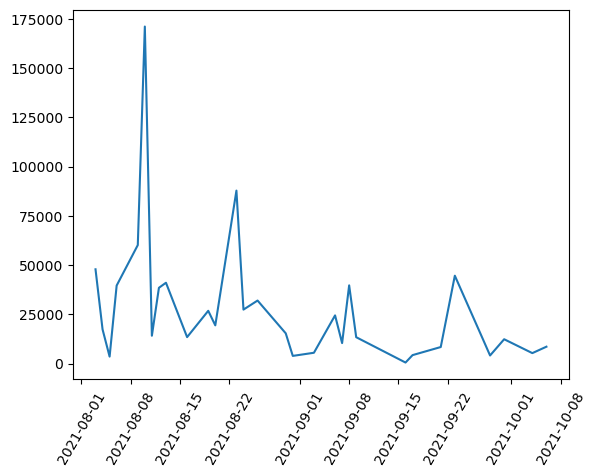

In [8]:
plt.plot(agg_data_july['receiving_date'], agg_data_july['sum'])
plt.xticks(rotation=60)

3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [9]:
agg_data_sept = data[data['month']=='Сентябрь 2021'].groupby('sale')['sum'].sum().reset_index()
print(agg_data_sept[agg_data_sept['sum'] == max(agg_data_sept['sum'])]['sale'])

6    Смирнов
Name: sale, dtype: object


Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [10]:
agg_data_oct = data[data['month']=='Октябрь 2021'].groupby(r'new/current').count().reset_index(names="count")
agg_data_oct

,count,client_id,sum,status,sale,document,receiving_date,month
0,новая,36,36,36,36,36,5,36
1,текущая,99,99,99,99,97,40,99


Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [11]:
start_date = datetime.strptime('2021-07-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime('2021-07-31 23:59:59', '%Y-%m-%d %H:%M:%S')

data_nona_date = data.dropna(subset=['receiving_date'])
data_nona_date = data_nona_date.loc[data_nona_date['receiving_date'] != '-']

len(data_nona_date[(data_nona_date['month'] == 'Май 2021') & (data_nona_date['document'] == 'оригинал') & (data_nona_date['receiving_date'] >= start_date) & (data_nona_date['receiving_date'] <= end_date)])

37

## Задание

In [12]:
data['managers_returns'] = 0

end_date = datetime.strptime('2021-07-01 00:00:00', '%Y-%m-%d %H:%M:%S')

In [13]:
for i in range(len(data)):
    if (data['new/current'][i] == 'новая') & (data['status'][i] == 'ОПЛАЧЕНО') & (data['document'][i] == 'оригинал'):
        if data['receiving_date'][i] < end_date:
            data.loc[i, 'managers_returns'] = data['sum'][i] * 0.07
    elif (data['new/current'][i] == 'текущая') & (data['document'][i] == 'оригинал')  & (data['status'][i] != 'ПРОСРОЧЕНО'):  
        if data['receiving_date'][i] < end_date:
            if data['sum'][i] > 10000:
                data.loc[i, 'managers_returns'] = data['sum'][i] * 0.05
            else:
                data.loc[i, 'managers_returns'] = data['sum'][i] * 0.03

C:\Users\Victo\AppData\Local\Temp\ipykernel_14392\22709352.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '699.585' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, 'managers_returns'] = data['sum'][i] * 0.05


In [14]:
agg_data_managers = data.groupby('sale')['managers_returns'].sum().reset_index()
agg_data_managers.sort_values(by='managers_returns', ascending=False)

,sale,managers_returns
6,Петрова,7028.8020
1,Андреев,4798.2037
9,Смирнов,4078.7240
4,Кузнецова,2604.6716
3,Иванов,2503.8390
11,Филимонова,409.6830
8,Селиванов,353.3220
2,Васильев,339.2310
0,-,0.0000
5,Михайлов,0.0000
